In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import date, datetime
from typing import List, Tuple
import pdb
import pandas as pd

In [2]:
class Analyzer:

    def __init__(self, csv_file: str):
        self.df = pd.read_csv(csv_file, dtype={'datetime': 'str'},
                              parse_dates=['datetime']) 

        self.df['word_count'] = self.df.text.apply(lambda x: len(x.split()))
        self.df.index = self.df['datetime']

    def token_timeseries(self, token: str) -> List[Tuple[date, int]]:
        raise NotImplementedError


In [3]:
analyzer = Analyzer('../data/plenary-minutes.csv')
df = analyzer.df

## Data Preview

In [4]:
df

,date,datetime,title,period,type,text,period_number,word_count
datetime,,,,,,,,
1970-01-29,1970-01-29,1970-01-29,Plenarprotokoll vom 29.01.1970,6,PLENARPROTOKOLL,"Deutscher Bundestag\n27. Sitzung\nBonn, Donner...",27,10673
1970-02-25,1970-02-25,1970-02-25,Plenarprotokoll vom 25.02.1970,6,PLENARPROTOKOLL,"Deutscher Bundestag\n33. Sitzung\nBonn, Mittwo...",33,83747
1972-06-09,1972-06-09,1972-06-09,Plenarprotokoll vom 09.06.1972,6,PLENARPROTOKOLL,"Deutscher Bundestag\n190. Sitzung\nBonn, Freit...",190,29467
1972-04-28,1972-04-28,1972-04-28,Plenarprotokoll vom 28.04.1972,6,PLENARPROTOKOLL,"Deutscher Bundestag\n184. Sitzung\nBonn, Freit...",184,38324
1971-12-01,1971-12-01,1971-12-01,Plenarprotokoll vom 01.12.1971,6,PLENARPROTOKOLL,"Deutscher Bundestag\n153. Sitzung\nBonn, Mittw...",153,45403
...,...,...,...,...,...,...,...,...
2009-01-14,2009-01-14,2009-01-14,Plenarprotokoll vom 14.01.2009,16,PLENARPROTOKOLL,Plenarprotokoll 16/198\nDeutscher Bundestag\nS...,198,30895
2009-02-12,2009-02-12,2009-02-12,Plenarprotokoll vom 12.02.2009,16,PLENARPROTOKOLL,Plenarprotokoll 16/205\nDeutscher Bundestag\nS...,205,127142
2009-03-19,2009-03-19,2009-03-19,Plenarprotokoll vom 19.03.2009,16,PLENARPROTOKOLL,Plenarprotokoll 16/211\nDeutscher Bundestag\nS...,211,172755


## Example Text Field of an Document

In [5]:
df.text[0]

'Deutscher Bundestag\\n27. Sitzung\\nBonn, Donnerstag, den 29. Januar 1970\\nInhalt:\\nAmtliche Mitteilungen\t1173 A\\nFragestunde (Drucksache VI/273)\\nFrage des Abg. Weigl:\\nÄußerung des Bundeskanzlers zur Wiedervereinigung Deutschlands\\nDr. Ehmke, Bundesminister\t1173 D,\\n1174 A, B\\nWeigl (CDU/CSU)\t1174 A Baier (CDU/CSU)\t1174 B\\nFrage des Abg. Baier:\\nVerbesserung des Inlandsmarktes für Walzdraht\\nDr. Arndt, Parlamentarischer\\nStaatssekretär\t1174 C, D\\nBaier (CDU/CSU) \t 1174 D\\nFrage des Abg. Werner:\\nErhöhung des Hermes-Plafonds für arabische Staaten\\nDr. Arndt, Parlamentarischer\\nStaatssekretar \t 1175 A, B\\nWerner (CDU/CSU) \t 1175 B\\nFragen des Abg. Hussing:\\nAufhebung der Preisbindung für Markenartikel\\nDr. Arndt, Parlamentarischer\\nStaatssekretär .\t1175 C, D, 1176 A, C, D,\\n1177 A, B, C\\nHussing (CDU/CSU) .\t1175 C, 1176 B, C\\nVogt (CDU/CSU) \t 1175 D\\nMatthöfer (SPD) \t 1176 A\\nBreidbach (CDU/CSU) \t 1176 D\\nFrau Griesinger (CDU/CSU)\t1176 D\\nDr.

## Word count per Year

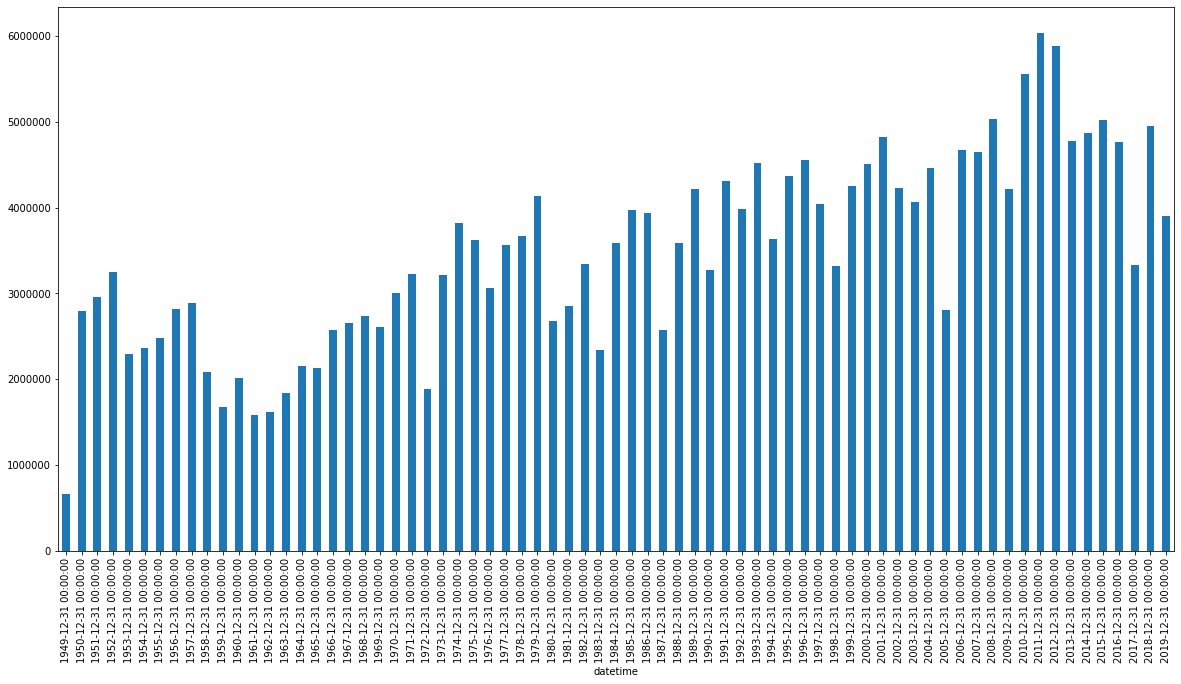

In [6]:
df.word_count.resample('Y').sum().plot(kind='bar', figsize=(20,10))

## Total Number of Words

In [7]:
df.word_count.sum()

247190919

## Number of documents per year

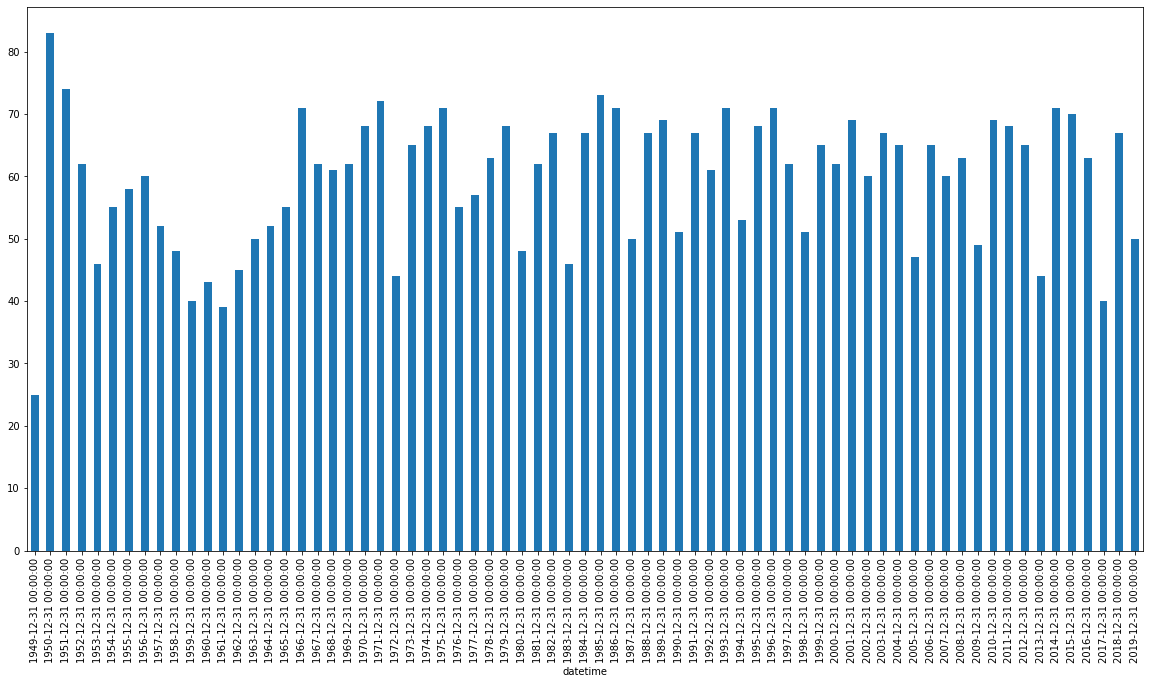

In [8]:
df.resample('Y')['date'].count().plot(kind='bar', figsize=(20,10))